In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

os.chdir('/Users/mingzhangyin/Dropbox (UFL)/UF teaching/My course/2-data model and infernece') # add your data path here

loadhou = pd.read_csv('loadhou.csv')

In [5]:
loadhou

,Time,KHOU,COAST
0,1/1/10 15:00,7.10,8222.029420
1,1/2/10 15:00,9.10,8379.872342
2,1/3/10 15:00,6.10,8679.087157
3,1/4/10 15:00,4.10,10273.567000
4,1/5/10 15:00,3.10,10317.801170
...,...,...,...
2352,6/26/16 15:00,31.60,16588.555300
2353,6/27/16 15:00,31.60,18056.292190
2354,6/28/16 15:00,31.60,16908.966850
2355,6/29/16 15:00,29.35,17397.014410


In [8]:
N = loadhou.shape[0]
N_train = int(np.floor(0.8 * N))

np.random.seed(123)  # set the random seed for reproducibility
train_ind = np.sort(np.random.choice(N, N_train, replace=False))

D_train = loadhou.loc[train_ind, :]
D_test = loadhou.loc[~loadhou.index.isin(train_ind), :]

D_test = D_test.sort_values('KHOU')

In [7]:
N_train

1885

In [9]:
X_train = D_train['KHOU'][:,None]
y_train = D_train['COAST']

X_test = D_test['KHOU'][:,None]
y_test = D_test['COAST']

### fit a linear model as baseline

In [10]:
import statsmodels.api as sm
lm1 = sm.OLS(y_train, X_train).fit()

y_pred = lm1.predict(X_test)

lm1_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(lm1_rmse)

2535.5674192085226


### Train the KNN model and calculate RMSE on the test set

In [11]:
knn_model = KNeighborsRegressor(n_neighbors=25)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(knn_rmse)

999.6760278194722


### KNN  check performance across a variety of choices for K

In [13]:
k_grid

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 24,
 25,
 27,
 29,
 31,
 33,
 35,
 38,
 41,
 43,
 46,
 50,
 53,
 57,
 61,
 65,
 69,
 74,
 79,
 85,
 90,
 97,
 103,
 111,
 118,
 126,
 135,
 144,
 154,
 165,
 177,
 189,
 202,
 216,
 231,
 247,
 264,
 282,
 301,
 322,
 344,
 368,
 394,
 421,
 450,
 481,
 515,
 550,
 588,
 629,
 672,
 719,
 769,
 822,
 879,
 939,
 1004,
 1074,
 1148,
 1227,
 1312,
 1403,
 1500]

In [12]:

k_grid = np.unique(np.round(np.exp(np.linspace(np.log(1500), np.log(2), num=100))))
k_grid = [int(_) for _ in k_grid]

rmse_grid_out = []
for k in k_grid:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_grid_out.append(rmse)

rmse_grid_out = pd.DataFrame({'K': k_grid, 'RMSE': rmse_grid_out})


In [15]:
ind_best = np.argmin(rmse_grid_out['RMSE'])
k_best = k_grid[ind_best]

In [16]:
k_best

46

In [14]:
rmse_grid_out.head()

,K,RMSE
0,2,1314.625433
1,3,1233.870110
2,4,1164.823746
3,5,1116.595359
4,6,1081.516946


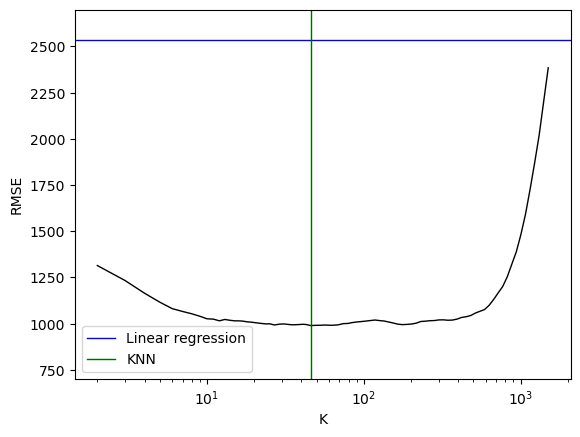

In [10]:
plt.figure()
plt.plot(rmse_grid_out['K'], rmse_grid_out['RMSE'], linewidth=1, color='black')
plt.xscale('log')
plt.ylim(700, 2700)
plt.axhline(y=lm1_rmse, color='blue', linewidth=1, label='Linear regression')
plt.axvline(x=k_best, color='darkgreen', linewidth=1, label='KNN')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### K-nearest neighbors: at the optimal k 

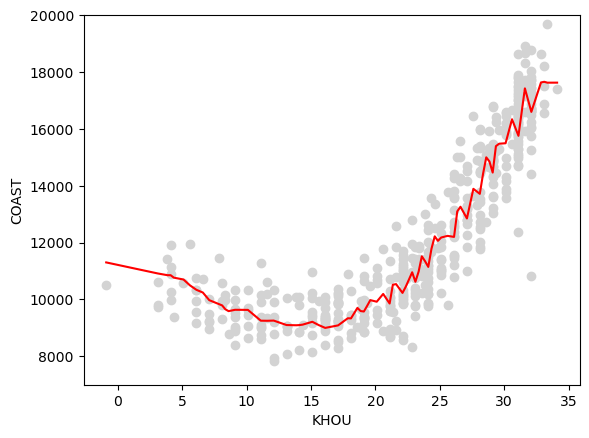

In [17]:
knn_model = KNeighborsRegressor(n_neighbors=k_best)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred))

D_test['ypred'] = y_pred

p_test = plt.figure()
plt.scatter(D_test['KHOU'], D_test['COAST'], color='lightgrey')
plt.plot(D_test['KHOU'], D_test['ypred'], color='red', linewidth=1.5)
plt.ylim(7000, 20000)
plt.xlabel('KHOU')
plt.ylabel('COAST')
plt.show()